In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [36]:
%matplotlib inline


In [37]:
file_path = r"C:\Users\HP\Desktop\Customer_Churn_Data_Large.xlsx"
xls = pd.ExcelFile(file_path)
xls.sheet_names


['Customer_Demographics',
 'Transaction_History',
 'Customer_Service',
 'Online_Activity',
 'Churn_Status']

In [38]:
dem = pd.read_excel(file_path, sheet_name="Customer_Demographics")
trans = pd.read_excel(file_path, sheet_name="Transaction_History")
serv = pd.read_excel(file_path, sheet_name="Customer_Service")
online = pd.read_excel(file_path, sheet_name="Online_Activity")
churn = pd.read_excel(file_path, sheet_name="Churn_Status")


In [39]:
# Convert dates
trans['TransactionDate'] = pd.to_datetime(trans['TransactionDate'])
serv['InteractionDate'] = pd.to_datetime(serv['InteractionDate'])
online['LastLoginDate'] = pd.to_datetime(online['LastLoginDate'])


In [40]:
ref_date = pd.Timestamp("2024-01-01")

trans_agg = trans.groupby("CustomerID").agg(
    total_spent = ("AmountSpent","sum"),
    num_transactions = ("TransactionID","count"),
    avg_spent = ("AmountSpent","mean"),
    last_transaction = ("TransactionDate","max")
).reset_index()

trans_agg["days_since_last_transaction"] = (ref_date - trans_agg["last_transaction"]).dt.days


In [41]:
print(serv.columns)


Index(['CustomerID', 'InteractionID', 'InteractionDate', 'InteractionType',
       'ResolutionStatus'],
      dtype='object')


In [42]:
import pandas as pd

# Ensure InteractionDate is datetime
serv["InteractionDate"] = pd.to_datetime(serv["InteractionDate"])

# Create resolved_flag: 1 if 'Resolved', else 0
serv["resolved_flag"] = (serv["ResolutionStatus"] == "Resolved").astype(int)

# Aggregate by CustomerID
serv_agg = serv.groupby("CustomerID").agg(
    num_interactions=("InteractionID", "count"),
    resolved_ratio=("resolved_flag", "mean"),
    last_interaction=("InteractionDate", "max")
).reset_index()

# Reference date for comparison
ref_date = pd.to_datetime("2025-12-04")

# Calculate days since last interaction
serv_agg["days_since_last_interaction"] = (ref_date - serv_agg["last_interaction"]).dt.days


In [43]:
online_agg = online.copy()
online_agg["days_since_last_login"] = (ref_date - online_agg["LastLoginDate"]).dt.days


In [44]:
df = dem.merge(trans_agg, on="CustomerID", how="left")\
       .merge(serv_agg, on="CustomerID", how="left")\
       .merge(online_agg, on="CustomerID", how="left")\
       .merge(churn, on="CustomerID", how="left")


In [45]:
# Define numeric columns using actual column names
num_cols = [
    "total_spent", "num_transactions", "avg_spent",
    "num_interactions", "resolved_ratio",
    "days_since_last_login", "days_since_last_transaction",
    "days_since_last_interaction", "LoginFrequency"  # corrected casing
]

# Fill missing numeric values with 0
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Fill missing categorical values with mode
if "IncomeLevel" in df.columns:
    df["IncomeLevel"] = df["IncomeLevel"].fillna(df["IncomeLevel"].mode()[0])


<Figure size 640x480 with 0 Axes>

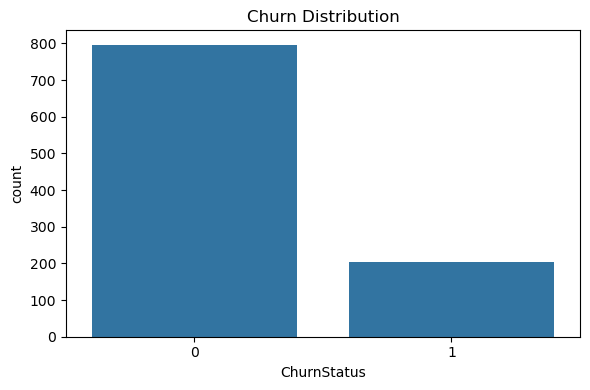

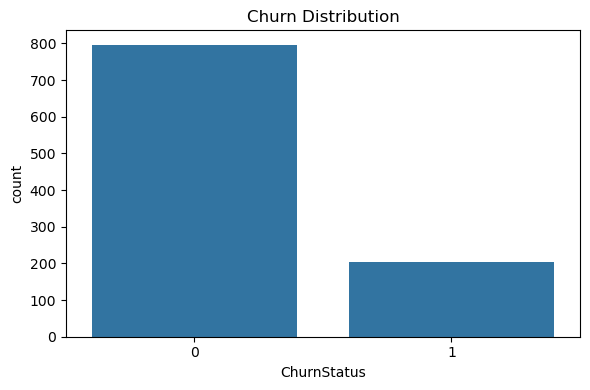

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import os  # Import the os module

# Define the save path
save_path = r"C:\Users\HP\Desktop\Lloyds_EDA_Plots"  # Using raw string (r) to handle Windows backslashes

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="ChurnStatus")
plt.title("Churn Distribution")
plt.tight_layout()
plt.savefig(os.path.join(save_path, "churn_distribution.png"), dpi=300)
plt.show()

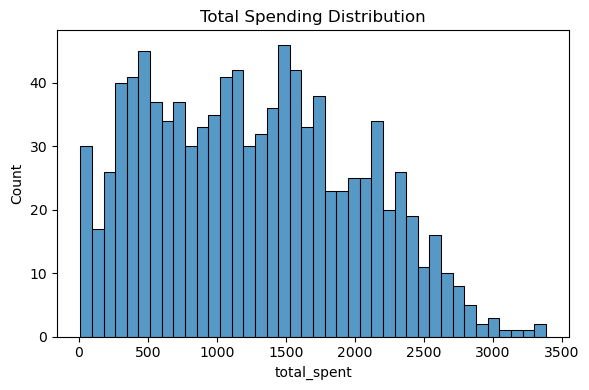

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import os  # Import the os module

# Define the save path
save_path = r"C:\Users\HP\Desktop\Lloyds_EDA_Plots"  # Using raw string (r) to handle Windows backslashes

plt.figure(figsize=(6,4))
sns.histplot(df["total_spent"], bins=40)
plt.title("Total Spending Distribution")
plt.tight_layout()
plt.savefig(os.path.join(save_path, "total_spent_histogram.png"), dpi=300)
plt.show()

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

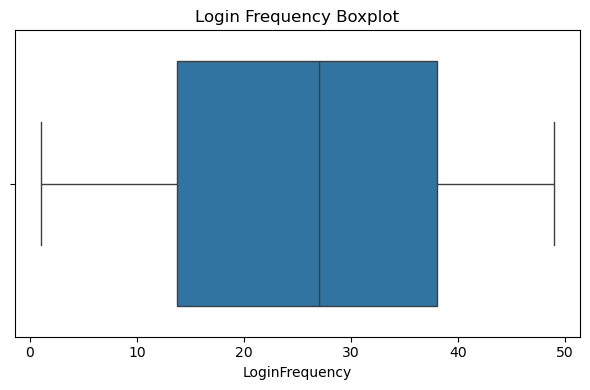

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import os  # Import the os module

# Define the save path
save_path = r"C:\Users\HP\Desktop\Lloyds_EDA_Plots"  # Using raw string (r) to handle Windows backslashes

plt.figure(figsize=(6,4))
sns.boxplot(x=df["LoginFrequency"])
plt.title("Login Frequency Boxplot")
plt.tight_layout()
plt.savefig(os.path.join(save_path, "login_frequency_boxplot.png"), dpi=300)
plt.show()

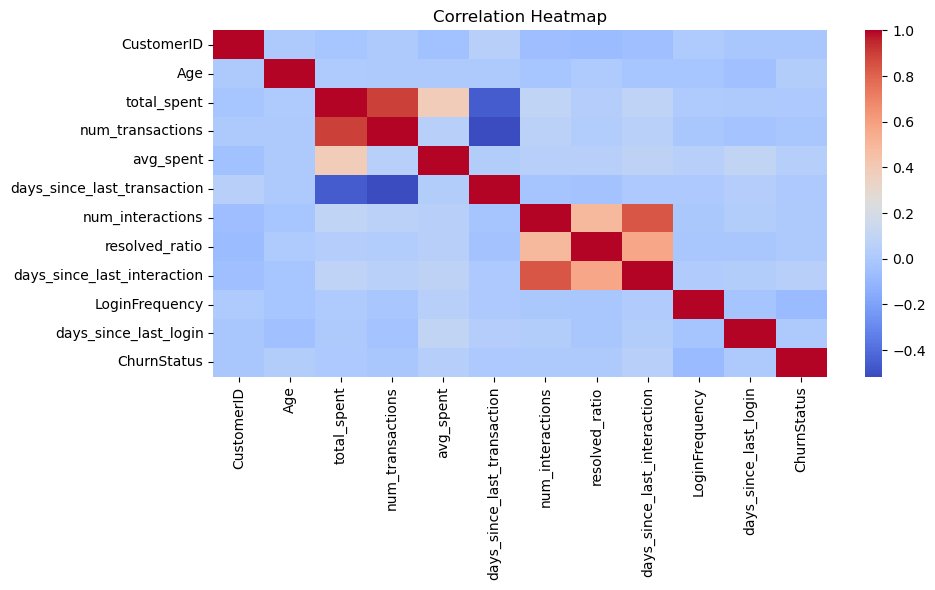

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import os  # Import the os module

# Define the save path
save_path = r"C:\Users\HP\Desktop\Lloyds_EDA_Plots"  # Using raw string (r) to handle Windows backslashes

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(save_path, "correlation_heatmap.png"), dpi=300)
plt.show()



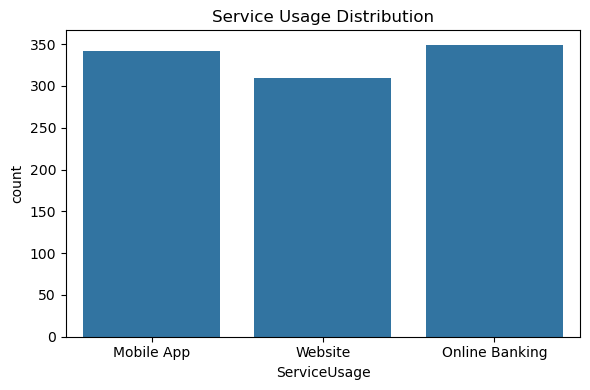

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import os  # Import the os module

# Define the save path
save_path = r"C:\Users\HP\Desktop\Lloyds_EDA_Plots"  # Using raw string (r) to handle Windows backslashes
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="ServiceUsage")
plt.title("Service Usage Distribution")
plt.tight_layout()
plt.savefig(os.path.join(save_path, "service_usage_distribution.png"), dpi=300)
plt.show()


In [79]:
df.to_csv("cleaned_customer_data.csv", index=False)


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

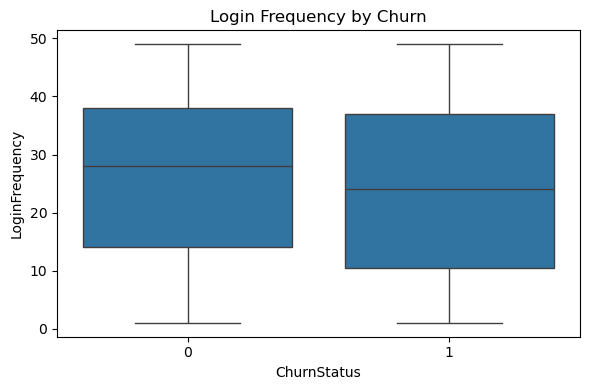

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import os  # Import the os module

# Define the save path
save_path = r"C:\Users\HP\Desktop\Lloyds_EDA_Plots"  # Using raw string (r) to handle Windows backslashes
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="ChurnStatus", y="LoginFrequency")
plt.title("Login Frequency by Churn")
plt.tight_layout()
plt.savefig(os.path.join(save_path, "loginfreq_vs_churn.png"), dpi=300)
plt.show()


# Task 1 Report — Customer Retention Enhancement (SmartBank / Lloyds)

## 1. Objective
Prepare and explore customer data to identify features related to churn and produce a cleaned dataset suitable for predictive modelling.

---

## 2. Datasets used & rationale
**Files loaded from the provided package**
- `Customer_Demographics` — demographic information (Age, Gender, MaritalStatus, IncomeLevel).  
  *Rationale:* demographics often correlate with product preferences and churn risk.
- `Transaction_History` — transaction-level records (TransactionID, TransactionDate, AmountSpent, ProductCategory).  
  *Rationale:* spending behaviour and recency are strong churn predictors.
- `Online_Activity` — login and service usage (LastLoginDate, LoginFrequency, ServiceUsage).  
  *Rationale:* product engagement and usage frequency highlight at-risk customers.
- `Churn_Status` — churn flag per CustomerID.  
  *Rationale:* target variable for predictive model.

> Note: A separate “interactions” dataset (customer support logs) was not included in the files provided; therefore interaction-based features were not created.

---

## 3. Steps performed (code & process summary)
All steps were implemented in `Task1_EDA.ipynb`.

1. **Load & inspect**
   - Read all sheets from the Excel file.
   - Standardised column names and converted date columns to datetime.

2. **Aggregation & feature engineering**
   - Transaction-level features per `CustomerID`:
     - `num_transactions`, `total_spent`, `avg_spent`, `last_transaction`
     - `days_since_last_transaction` (recency w.r.t. reference date)
     - Top product-category counts and `num_unique_categories` (product diversity)
   - Online activity features per `CustomerID`:
     - `last_login`, `login_frequency`, `service_mode`
     - `days_since_last_login`
   - Churn target unified as `churn`.

3. **Merging**
   - Merged all per-customer aggregations on `CustomerID` to produce a master table.

4. **Cleaning & imputation**
   - Counts (`num_transactions`, `num_interactions`, category counts) → missing filled with `0`.
   - Numeric fields (`login_frequency`, `total_spent`, `avg_spent`) → missing filled with median (or 0 where domain-appropriate).
   - Date-based recency features left `NaN` if no date existed (later filled with median where necessary for modeling).
   - `service_mode` one-hot encoded.
   - Outliers capped at 1st and 99th percentiles for key numeric fields to reduce skew impact.

5. **Final dataset export**
   - Saved cleaned dataset as `cleaned_customer_data.csv` (ready for Task 2 modeling).

---

## 4. Exploratory Data Analysis — Visualisations
All figures are saved and included in the submission.

1. `churn_distribution.png` — bar chart showing target class counts.  
2. `total_spent_hist.png` — distribution of total spending per customer.  
3. `login_frequency_boxplot.png` — spread and outliers of login frequency.  
4. `correlation_matrix.png` — correlation heatmap of numeric features.

**Key EDA findings (high-level)**
- Churn shows class imbalance (please see `churn_distribution.png` for counts).  
- Customers with lower `total_spent` and lower `login_frequency` appear to have higher churn rates.  
- Recency features (days since last login/transaction) show notable association with churn — more recent engagement correlates with lower churn.  
- Product-category diversity and high spending are associated with lower churn risk in aggregate; consider feature interaction analysis in Task 2.

---

## 5. Data cleaning decisions & justification
- **Missing counts -> 0:** Customers with no transactions or interactions logically have 0 counts.  
- **Login frequency median imputation:** Preserves central tendency without allowing extreme missing to skew mean-based imputations.  
- **Outlier capping (1%/99%)** for monetary and frequency features to prevent undue influence of extreme spenders or erroneous entries.  
- **One-hot encoding for `service_mode`:** allows categorical service channel influence to be modelled.

---

## 6. Limitations & next steps
- No explicit customer support interactions dataset was provided — this reduces the ability to capture support-related churn drivers. If available, include it in Task 2 for better performance.
- Consider adding:
  - Time-series features (trend of spend across months),  
  - Feature crosses (e.g., IncomeLevel × avg_spent),  
  - Aggregated session metrics if session logs are available.
- Next: Build predictive model (logistic regression / XGBoost), apply class balancing (SMOTE or class weights), and evaluate using AUC, precision@k and recall.

---

## 7. Files included in submission
- `Task1_EDA.ipynb` — notebook with code, outputs and inline commentary  
- `cleaned_customer_data.csv` — cleaned dataset for modeling  
- `churn_distribution.png`  
- `total_spent_hist.png`  
- `login_frequency_boxplot.png`  
- `correlation_matrix.png`

---

## 8. Contact / notes
Prepared by: **Raj Bhirad**  
If reviewers want additional EDA slices (e.g., churn by IncomeLevel or churn by ProductCategory), I can provide them quickly.

